In [2]:
#default_exp messenger

# 用Selenium直接Access帳戶資料

In [3]:
# import pkg
from selenium import webdriver
from time import sleep
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys

### Check before commit !!

In [4]:
#usr, pwd = blah
usr, pwd = input("帳號"), input("密碼")

In [5]:
driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get('https://www.facebook.com/')
print ("Opened facebook")
sleep(1)

username_box = driver.find_element('id','email')
username_box.send_keys(usr)
print ("Email Id entered")
sleep(1)

password_box = driver.find_element('id','pass')
password_box.send_keys(pwd)
print ("Password entered")

login_box = driver.find_element('name','login')
login_box.click()
print ("Login Done")
sleep(1)
#input('Press anything to quit')
#driver.quit()
#print("Finished")


<ipython-input-5-a64c2faaa62e>:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


Opened facebook
Email Id entered
Password entered
Login Done


In [6]:
#這邊要輸入對話框的ID
# 這個倒是不會變 (應該拉)
ChatID = '100001442998532'#實際點進一個對話框，看他的網址最後面那一串數字就是了
driver.get("https://www.facebook.com/messages/t/"+ChatID)

In [7]:
from selenium.webdriver.common.by import By

### 手抓XPath
### 重點是用相對的XPath, 而不是絕對的XPath

In [8]:
# 每次登入進去, 就算是一樣的句子, xpath 也會不一樣, 還在想辦法
"""
#進去之後就要去Get他對話裡面的Text，我的做法是用F12進去找他對話的xpath，然後直接複製過來
# p1: 絕對的
p1 = '//*[@id="jsc_c_2v"]/div/div/div[15]/div/div/div[1]/div[2]/div[1]/div[1]/div[1]/span/div[2]/div[1]/div/div'
dialogTxt = driver.find_element(By.XPATH,p1)
dialogTxt.text, dialogTxt.tagname
"""

'\n#進去之後就要去Get他對話裡面的Text，我的做法是用F12進去找他對話的xpath，然後直接複製過來\n# p1: 絕對的\np1 = \'//*[@id="jsc_c_2v"]/div/div/div[15]/div/div/div[1]/div[2]/div[1]/div[1]/div[1]/span/div[2]/div[1]/div/div\'\ndialogTxt = driver.find_element(By.XPATH,p1)\ndialogTxt.text, dialogTxt.tagname\n'

# 問題
1. 我現在只做到登入然後可以偷資料下來，但他的那些參數(ex: 對話編號、Dialog的xpath)都是我手動去抓的，不知道有沒有自動抓法
2. 網路上很多的作法都是Selenium改版前的，所以他很多功能都換了，也鎖了不少，能參考的文章不多(FB, Line API也是一樣)
3. 如果真的寫出來的話，不知道手機板的Messenger軟體有沒有辦法用一樣的方法去Access

### Search by element
#### use expression of xpath: [link] (https://iter01.com/539620.html)
#### 可以用xpath 語法找到指定的字串, 比方說: "六日" (如下圖)

In [12]:
# 相對的XPath
text_list = driver.find_elements(By.XPATH,'//*[contains(text(), "六")]')

In [13]:
for ele in text_list:
    print(ele.text)

男六輔導員肥宅之日本型男亂源之二 諧音爛梗王: 去哪
六日的話目前可配合你的時間


In [17]:
tmp = driver.find_element(By.XPATH, '//div[contains(@role, "gridcell")]')

In [19]:
tmp.text

'瘦仙貝\n瘦仙貝\nsent a photo.\n  ·\n57m'

In [21]:
tmplist = driver.find_elements(By.XPATH, '//div[contains(@dir, "auto")]')

In [22]:
len(tmplist)

11

In [26]:
for ele in tmplist:
    print(ele.text)

你好 我在臉書的租屋版看到你的貼文 請問現在可以預約看房嗎？
可以
你要約什麼時間看房
目前更新如下
台南東區近成大和火車站勝利路套房出租(可寵)
#有配合社會住宅 #東區套房 #可申請租金補助
【位置】:台南市東區勝利路171巷     
1.【租金】6500【特殊資格有打折】7月底前看房當天下訂金，月租6300元。
2.【類型】 :公寓
3.【格局】 :獨立套房
4.【電費】台電
5.【水費】 台水
6.【寵物】可
7.【設備】熱水器.冷氣.冰箱 電視 洗衣機
廁所和房間都有對外窗，在3樓無電梯。
8.可寵，需房東同意的寵物，租金會加500到1000元，需簽寵物條款。
9.7/16已全屋清潔打掃過。

育樂街旁 成大對面 火車站【3分】鬧區 學區 
歡迎在台南就業或就學的朋友來看屋，即日起可看房。
請洽兆基業務吳小姐，Line【0952744440】或私訊我。
請問下禮拜什麼時間有空呢？
今天可以喔
平日晚上7點後也可以
六日的話目前可配合你的時間
好的我再回覆你
謝謝


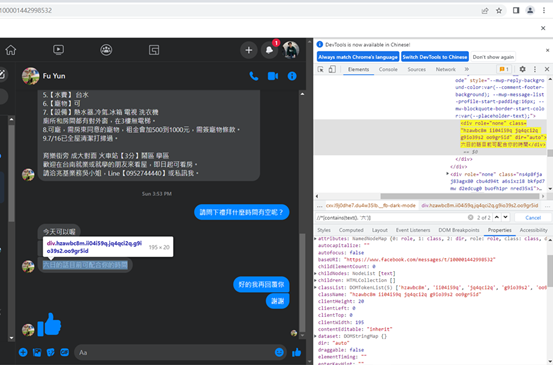

### Try to locate each chat without manually input ID

In [34]:
# ChatID = '100001442998532'#實際點進一個對話框，看他的網址最後面那一串數字就是了
# driver.get("https://www.facebook.com/messages/t/"+ChatID)
driver.get("https://www.facebook.com/messages/t/")

In [41]:
# another
another = driver.find_element(By.XPATH, '//div[@aria-label="Chats"]')

In [45]:
another.text

'瘦仙貝\n瘦仙貝\nsent a photo.\n  ·\n1h\n尖洒與巨哥的巢穴之各種人事尖巨\n男六輔導員肥宅之日本型男亂源之二 諧音爛梗王: 去哪\n  ·\n11h\nFu Yun\n  ·\n3d\n勞銘業\n銘業 sent a photo.\n  ·\n1w\nChih-yu Lee\nYou: ok\n  ·\n2w\nJensen Huang\nReacted\nto your message\n  ·\n2w\nF54hangingout\nPeter sent a video.\n  ·\n5w\n王星宇\n沒事沒事～\n  ·\n6w\n溫景裕\nYou:\n  ·\n6w\n賴昱豪\n昱豪 sent an attachment.\n  ·\n9w\nSean Chang\nYou: Interesting……\n  ·\n13w\n劉語恩\n來都來\n  ·\n20w\n薛亦呈\n嗯嗯不會\n  ·\n25w\nLin Justin\nLin sent a sticker.\n  ·\n27w'

In [56]:
#other = driver.find_element(By.XPATH, '//div[@aria-label="Chats"]')
other = driver.find_elements(By.XPATH, '//div[@data-testid="mwthreadlist-item-open"]')
#other = driver.find_element(By.XPATH, '//div[@aria-label="Conversation with Jensen Huang"]')

In [57]:
for ele in other:
    print(ele.text)

瘦仙貝
瘦仙貝
sent a photo.
  ·
1h
尖洒與巨哥的巢穴之各種人事尖巨
男六輔導員肥宅之日本型男亂源之二 諧音爛梗王: 去哪
  ·
11h
Fu Yun
  ·
3d
勞銘業
銘業 sent a photo.
  ·
1w
Chih-yu Lee
You: ok
  ·
2w
Jensen Huang
Reacted
to your message
  ·
2w
F54hangingout
Peter sent a video.
  ·
5w
王星宇
沒事沒事～
  ·
6w
溫景裕
You:
  ·
6w
賴昱豪
昱豪 sent an attachment.
  ·
9w
Sean Chang
You: Interesting……
  ·
13w
劉語恩
來都來
  ·
20w
薛亦呈
嗯嗯不會
  ·
25w
Lin Justin
Lin sent a sticker.
  ·
27w


### 設計讓帳號只要輸入一次就好(除非使用者想重新輸入)

In [ ]:
#export
from functools import lru_cache
# maxsize=1: 只能暫存一組帳號紀錄
@lru_cache(maxsize=1)
def get_info(reset=False):
    # if user doesn't want to re-enter info
    # and one has enter login before this program is exited
    # if user wants to re-enter his/hers info:
    #   clear the previous entered record
    if reset == True:
        print("clear previous entered info")
        get_info.cache_clear()
    # if the user has entered account info
    if get_info.cache_info().hits > 0:
        print("hits: %d; entered, return" % get_info.cache_info().hits)
        return
    # else, enter the info
    return input("account: "), input("password: ")


In [ ]:
def test_get_info(reset=False):
    for ele in get_info(reset):
        print(ele)
    print("called number", get_info.cache_info().hits)

In [ ]:
# first call
test_get_info()

kkk
fff
called number 0


In [ ]:
# if we call it again here
# it'll directly print the previous input info
test_get_info()

kkk
fff
called number 1


In [ ]:
# if we want to reset the account info
test_get_info(True)

clear previous entered info
jjj
eee
called number 0


In [ ]:
#export
# Attention: it'll automatically logout when this function is over
def login(reset=False, cb_list=[]):
    usr, pwd = get_info(reset=reset)
    from selenium import webdriver
    from webdriver_manager.chrome import ChromeDriverManager
    from time import sleep
    driver = webdriver.Chrome(ChromeDriverManager().install())
    driver.get('https://www.facebook.com/')
    print ("Opened facebook")
    sleep(1)

    username_box = driver.find_element('id','email')
    username_box.send_keys(usr)
    print ("Email Id entered")
    sleep(1)

    password_box = driver.find_element('id','pass')
    password_box.send_keys(pwd)
    print ("Password entered")

    login_box = driver.find_element('name','login')
    login_box.click()
    print ("Login Done")
    sleep(1)
    # loop through cb_list here
    # cb_list: list of name of the functions to be executed:
    # aka, a list of string
    # e.g., download conversation, ....
    for ele in cb_list:
        #TODO how do we call function via string
        # since directly input functions
        pass
    return True


In [ ]:
login()

<ipython-input-14-371de27dc207>:7: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


Opened facebook
Email Id entered
Password entered
Login Done


True

In [ ]:
# reset works 
login(True)

clear previous entered info



<ipython-input-14-371de27dc207>:7: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


Opened facebook
Email Id entered
Password entered
Login Done


True